In [2]:
from datascience import *
import numpy as np
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
plots.rcParams["patch.force_edgecolor"] = True

## Lecture 8 ##

## Categorical Distribution ##

In [3]:
top_movies = Table.read_table('top_movies_2017.csv')
top_movies

Title,Studio,Gross,Gross (Adjusted),Year
Gone with the Wind,MGM,198676459,1796176700,1939
Star Wars,Fox,460998007,1583483200,1977
The Sound of Music,Fox,158671368,1266072700,1965
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982
Titanic,Paramount,658672302,1204368000,1997
The Ten Commandments,Paramount,65500000,1164590000,1956
Jaws,Universal,260000000,1138620700,1975
Doctor Zhivago,MGM,111721910,1103564200,1965
The Exorcist,Warner Brothers,232906145,983226600,1973
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937


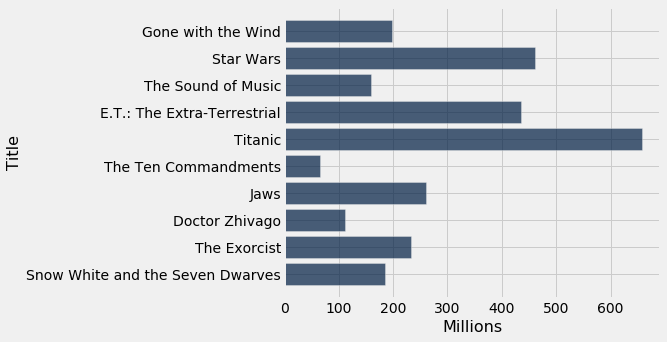

In [4]:
top_movies = top_movies.with_column('Millions', np.round(top_movies.column('Gross')/1000000,3))
top_movies.take(np.arange(10)).barh('Title', 'Millions')

In [5]:
studios = top_movies.select('Studio')
studios

Studio
MGM
Fox
Fox
Universal
Paramount
Paramount
Universal
MGM
Warner Brothers
Disney


In [6]:
studio_distribution = studios.group('Studio')

In [7]:
studio_distribution

Studio,count
AVCO,1
Buena Vista,35
Columbia,9
Disney,11
Dreamworks,3
Fox,24
IFC,1
Lionsgate,3
MGM,7
Metro,1


In [8]:
sum(studio_distribution.column('count'))

200

## Bar Charts ##

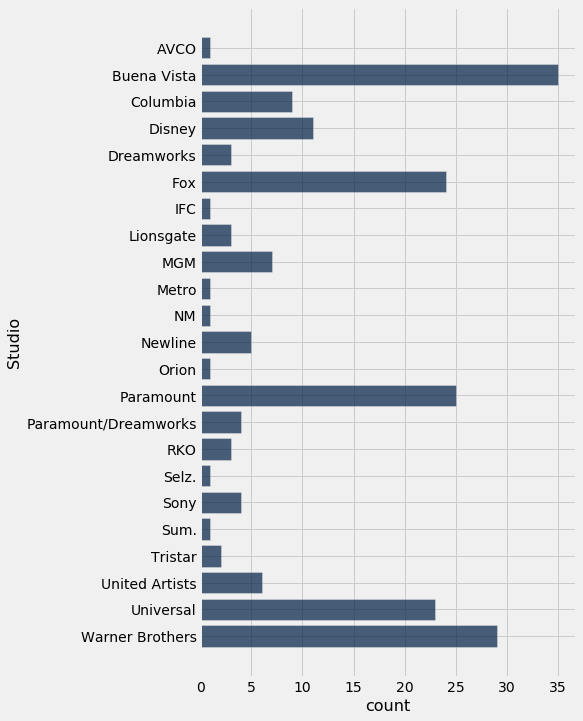

In [9]:
studio_distribution.barh('Studio')

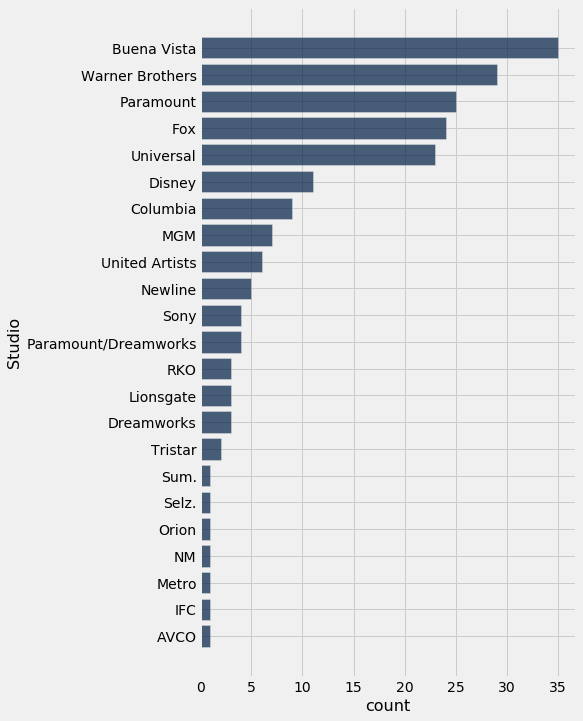

In [10]:
studio_distribution.sort('count', descending=True).barh('Studio')

## Numerical Distribution ##

In [11]:
ages = 2020 - top_movies.column('Year')
top_movies = top_movies.with_column('Age', ages)

In [12]:
top_movies

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
Gone with the Wind,MGM,198676459,1796176700,1939,198.676,81
Star Wars,Fox,460998007,1583483200,1977,460.998,43
The Sound of Music,Fox,158671368,1266072700,1965,158.671,55
E.T.: The Extra-Terrestrial,Universal,435110554,1261085000,1982,435.111,38
Titanic,Paramount,658672302,1204368000,1997,658.672,23
The Ten Commandments,Paramount,65500000,1164590000,1956,65.5,64
Jaws,Universal,260000000,1138620700,1975,260,45
Doctor Zhivago,MGM,111721910,1103564200,1965,111.722,55
The Exorcist,Warner Brothers,232906145,983226600,1973,232.906,47
Snow White and the Seven Dwarves,Disney,184925486,969010000,1937,184.925,83


## Binning ##

In [13]:
min(ages), max(ages)

(3, 99)

In [14]:
my_bins = make_array(0, 5, 10, 15, 25, 45, 65,100)

In [15]:
binned_data = top_movies.bin('Age', bins = my_bins)
binned_data

bin,Age count
0,12
5,18
10,17
15,41
25,53
45,41
65,18
100,0


In [16]:
sum(binned_data.column('Age count'))

200

In [17]:
top_movies.bin('Age', bins = np.arange(0, 101, 25))

bin,Age count
0,88
25,66
50,38
75,8
100,0


In [18]:
top_movies.bin('Age', bins = np.arange(0, 60, 25))

bin,Age count
0,88
25,70
50,0


In [19]:
top_movies.where('Age', 50)

Title,Studio,Gross,Gross (Adjusted),Year,Millions,Age
Love Story,Paramount,106397186,622283500,1970,106.397,50
Airport,Universal,100489151,587729300,1970,100.489,50
M.A.S.H.,Fox,81600000,477252600,1970,81.6,50
Patton,Fox,61749765,354164800,1970,61.75,50


## Histograms ##

In [20]:
my_bins

array([  0,   5,  10,  15,  25,  45,  65, 100])

In [21]:
binned_data

bin,Age count
0,12
5,18
10,17
15,41
25,53
45,41
65,18
100,0


In [22]:
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [23]:
binned_data

bin,Age count,Percent
0,12,6
5,18,9
10,17,8.5
15,41,20.5
25,53,26.5
45,41,20.5
65,18,9
100,0,0


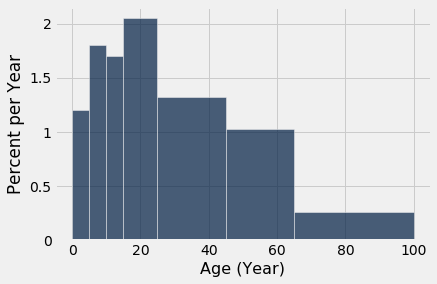

In [24]:
# Let's make our first histogram!
top_movies.hist('Age', bins = my_bins, unit = 'Year')

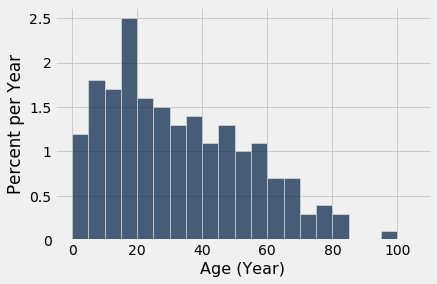

In [25]:
top_movies.hist('Age', bins = np.arange(0, 110, 5), unit = 'Year')

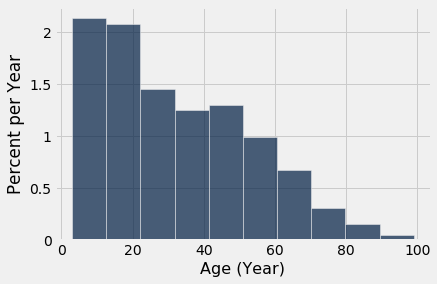

In [26]:
# Let's try not specifying any bins!
top_movies.hist('Age', unit='Year')

In [27]:
# Add a column containing what percent of movies are in each bin
binned_data = binned_data.with_column(
    'Percent', 100*binned_data.column('Age count')/200)

In [28]:
binned_data

bin,Age count,Percent
0,12,6
5,18,9
10,17,8.5
15,41,20.5
25,53,26.5
45,41,20.5
65,18,9
100,0,0


In [31]:
## Height ##

percent = binned_data.where('bin', 40).column('Percent').item

In [32]:
# Step 1: Calculate % of movies in the [40, 65) bin
percent = binned_data.where('bin', 40).column('Percent').item(0)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [33]:
# Step 2: Calculate the width of the 40-65 bin
width = 65 - 40

In [34]:
# Step 3: Area of rectangle = height * width
#         --> height = percent / width
height = percent / width
height

TypeError: unsupported operand type(s) for /: 'builtin_function_or_method' and 'int'

In [35]:
### What are the heights of the rest of the bins?

In [36]:
# Get the bin lefts
bin_lefts = binned_data.take(np.arange(binned_data.num_rows - 1))

In [37]:
# Get the bin widths
bin_widths = np.diff(binned_data.column('bin'))
bin_lefts = bin_lefts.with_column('Width', bin_widths)

In [38]:
# Get the bin heights
bin_heights = bin_lefts.column('Percent') / bin_widths
bin_lefts = bin_lefts.with_column('Height', bin_heights)

In [39]:
bin_lefts

bin,Age count,Percent,Width,Height
0,12,6,5,1.2
5,18,9,5,1.8
10,17,8.5,5,1.7
15,41,20.5,10,2.05
25,53,26.5,20,1.325
45,41,20.5,20,1.025
65,18,9,35,0.257143


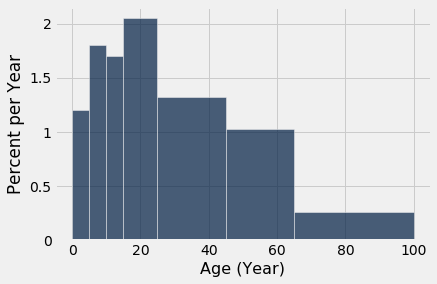

In [40]:
top_movies.hist('Age', bins = my_bins, unit = 'Year')

In [44]:
Binne_data= binned_data.with_column(
'percent', binned_data.column('Age count')/200*100)
percent

<function ndarray.item>

In [43]:
percent=binned_data.where('bin',40).column('Percent').item(0)
percent


IndexError: index 0 is out of bounds for axis 0 with size 0

In [48]:
bin_lefts= binned_data.take(np.arange(binned_data.num_rows-1))
bin_lefts= bin_lefts.with_column('Width', bin_widths)
bin_lefts

bin,Age count,Percent,Width
0,12,6,5
5,18,9,5
10,17,8.5,5
15,41,20.5,10
25,53,26.5,20
45,41,20.5,20
65,18,9,35


In [45]:
binned_data

bin,Age count,Percent
0,12,6
5,18,9
10,17,8.5
15,41,20.5
25,53,26.5
45,41,20.5
65,18,9
100,0,0


In [50]:
bin_heights= bin_lefts.column('Percent')/ bin_lefts.column('Width')
bin_lefts= bin_lefts.with_column("Width", bin_widths)
bin_lefts

bin,Age count,Percent,Width
0,12,6,5
5,18,9,5
10,17,8.5,5
15,41,20.5,10
25,53,26.5,20
45,41,20.5,20
65,18,9,35


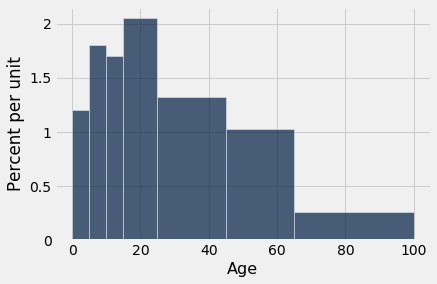

In [53]:
top_movies.hist('Age', bins=my_bins, )